# Identifying the type of Gemstone.

A gemstone (also called a fine gem, jewel, precious stone, semiprecious stone, or simply gem) is a piece of mineral crystal which, in cut and polished form, is used to make jewelry or other adornments.[1][2][3] However, certain rocks (such as lapis lazuli, opal, and obsidian) and occasionally organic materials that are not minerals (such as amber, jet, and pearl) are also used for jewelry and are therefore often considered to be gemstones as well.For more info: https://en.wikipedia.org/wiki/Gemstone

**About the Dataset:**
This dataset contains 3,200+ images of different gemstones. The images are grouped into 87 classes which are already divided into train and test data. All images are in various sizes and are in .jpeg format.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d lsind18/gemstones-images

 96% 53.0M/55.2M [00:03<00:00, 19.8MB/s]
100% 55.2M/55.2M [00:04<00:00, 14.4MB/s]


In [4]:
import zipfile

zip_ref = zipfile.ZipFile("gemstones-images.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
!ls /content/train

 Alexandrite	      Chrysocolla     Larimar		 'Sapphire Blue'
 Almandine	      Chrysoprase     Malachite		 'Sapphire Pink'
 Amazonite	      Citrine	      Moonstone		 'Sapphire Purple'
 Amber		      Coral	      Morganite		 'Sapphire Yellow'
 Amethyst	      Danburite      'Onyx Black'	  Scapolite
 Ametrine	      Diamond	     'Onyx Green'	  Serpentine
 Andalusite	      Diaspore	     'Onyx Red'		  Sodalite
 Andradite	      Dumortierite    Opal		  Spessartite
 Aquamarine	      Emerald	      Pearl		  Sphene
'Aventurine Green'    Fluorite	      Peridot		  Spinel
'Aventurine Yellow'  'Garnet Red'     Prehnite		  Spodumene
 Benitoite	      Goshenite       Pyrite		  Sunstone
'Beryl Golden'	      Grossular       Pyrope		  Tanzanite
 Bixbite	      Hessonite      'Quartz Beer'	 'Tigers Eye'
 Bloodstone	      Hiddenite      'Quartz Lemon'	  Topaz
'Blue Lace Agate'     Iolite	     'Quartz Rose'	  Tourmaline
 Carnelian	      Jade	     'Quartz Rutilated'   Tsavorite
'Cats Eye'	      Jasper	     'Quartz 

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("/content/train"):
    print(f"Current directory: {dirpath}")
    print(f"There are total {len(dirnames)} subdirectories and {len(filenames)} files")

Current directory: /content/train
There are total 87 subdirectories and 0 files
Current directory: /content/train/Chalcedony Blue
There are total 0 subdirectories and 30 files
Current directory: /content/train/Tourmaline
There are total 0 subdirectories and 38 files
Current directory: /content/train/Spessartite
There are total 0 subdirectories and 30 files
Current directory: /content/train/Amethyst
There are total 0 subdirectories and 35 files
Current directory: /content/train/Chrysoprase
There are total 0 subdirectories and 30 files
Current directory: /content/train/Chrysoberyl
There are total 0 subdirectories and 31 files
Current directory: /content/train/Quartz Rose
There are total 0 subdirectories and 35 files
Current directory: /content/train/Andalusite
There are total 0 subdirectories and 32 files
Current directory: /content/train/Pearl
There are total 0 subdirectories and 33 files
Current directory: /content/train/Lapis Lazuli
There are total 0 subdirectories and 31 files
Curren

In [7]:
# Getting train and test directories

train_dir = "/content/train"
test_dir = "/content/test"



## Preprocessing the data

In [8]:
# Getting class names

import numpy as np
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['Alexandrite' 'Almandine' 'Amazonite' 'Amber' 'Amethyst' 'Ametrine'
 'Andalusite' 'Andradite' 'Aquamarine' 'Aventurine Green'
 'Aventurine Yellow' 'Benitoite' 'Beryl Golden' 'Bixbite' 'Bloodstone'
 'Blue Lace Agate' 'Carnelian' 'Cats Eye' 'Chalcedony' 'Chalcedony Blue'
 'Chrome Diopside' 'Chrysoberyl' 'Chrysocolla' 'Chrysoprase' 'Citrine'
 'Coral' 'Danburite' 'Diamond' 'Diaspore' 'Dumortierite' 'Emerald'
 'Fluorite' 'Garnet Red' 'Goshenite' 'Grossular' 'Hessonite' 'Hiddenite'
 'Iolite' 'Jade' 'Jasper' 'Kunzite' 'Kyanite' 'Labradorite' 'Lapis Lazuli'
 'Larimar' 'Malachite' 'Moonstone' 'Morganite' 'Onyx Black' 'Onyx Green'
 'Onyx Red' 'Opal' 'Pearl' 'Peridot' 'Prehnite' 'Pyrite' 'Pyrope'
 'Quartz Beer' 'Quartz Lemon' 'Quartz Rose' 'Quartz Rutilated'
 'Quartz Smoky' 'Rhodochrosite' 'Rhodolite' 'Rhodonite' 'Ruby'
 'Sapphire Blue' 'Sapphire Pink' 'Sapphire Purple' 'Sapphire Yellow'
 'Scapolite' 'Serpentine' 'Sodalite' 'Spessartite' 'Sphene' 'Spinel'
 'Spodumene' 'Sunstone' 'Tanzanite' 'Tig

In [9]:
# View random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_img(target_dir, target_class, ax=None):
  target_folder = target_dir + "/" + target_class

  random_img = random.choice(os.listdir(target_folder))
  print(random_img)

  img = mpimg.imread(target_folder + "/" + random_img)

  if(ax == None):
    plt.imshow(img)
    plt.axis("off")
    plt.title(target_folder);
  else:
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(target_class)

  print(f"img shape: {img.shape}")

  return img

jade_5.jpg
img shape: (300, 300, 3)


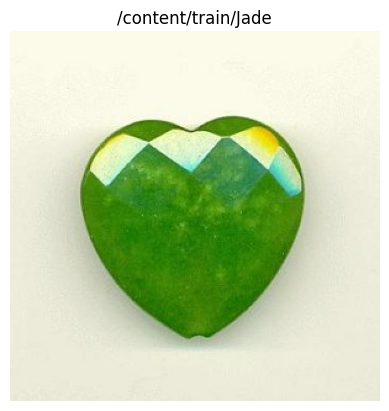

In [10]:
img = view_random_img(train_dir, "Jade")

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = data_gen.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode='categorical', batch_size=32)
valid_data_gen = data_gen.flow_from_directory(directory=test_dir, target_size=(224, 224), class_mode='categorical', batch_size=32)


Found 2856 images belonging to 87 classes.
Found 363 images belonging to 87 classes.


## Building a CNN model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(87, activation='softmax'),
])

In [13]:
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      2912      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      2890      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 10)        9

In [14]:
history = model.fit(train_data_gen,
                    epochs=5,
                    steps_per_epoch=len(train_data_gen),
                    validation_data=valid_data_gen,
                    validation_steps=len(valid_data_gen))

Epoch 1/5
90/90 [==============================] - 22s 105ms/step - loss: 3.8519 - accuracy: 0.0945 - val_loss: 2.8852 - val_accuracy: 0.2397
Epoch 2/5
90/90 [==============================] - 8s 91ms/step - loss: 2.1441 - accuracy: 0.4058 - val_loss: 2.4546 - val_accuracy: 0.3085
Epoch 3/5
90/90 [==============================] - 9s 98ms/step - loss: 1.3099 - accuracy: 0.6197 - val_loss: 2.4176 - val_accuracy: 0.3802
Epoch 4/5
90/90 [==============================] - 9s 96ms/step - loss: 0.8259 - accuracy: 0.7654 - val_loss: 2.6560 - val_accuracy: 0.4105
Epoch 5/5
90/90 [==============================] - 8s 87ms/step - loss: 0.3985 - accuracy: 0.8778 - val_loss: 3.0223 - val_accuracy: 0.4050


In [15]:
def loss_curve(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label="Training_Loss")
  plt.plot(epochs, val_loss, label="Val_Loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_Accuracy1")
  plt.plot(epochs, val_accuracy, label="Val_Accuracy")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

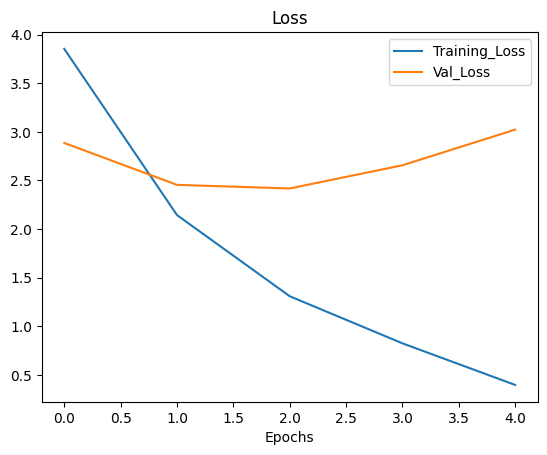

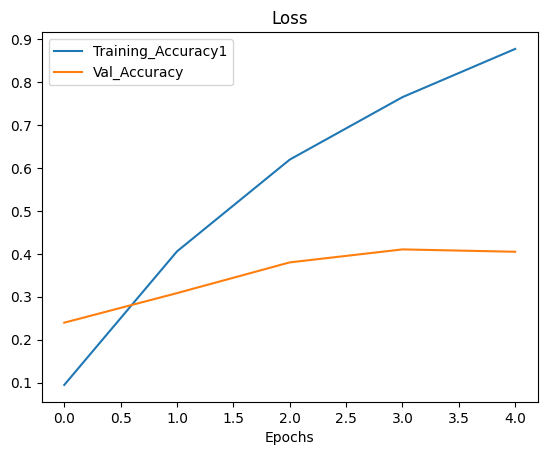

In [16]:
loss_curve(history)

## Improving Model with Data Augmentation

In [17]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = train_datagen_aug.flow_from_directory(directory=train_dir,
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 2856 images belonging to 87 classes.


In [18]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(87, activation='softmax'),
])

In [19]:
model_1.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [20]:

history_1 = model_1.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data_gen),
                            validation_data=valid_data_gen,
                            validation_steps=len(valid_data_gen)

                            )

Epoch 1/5
90/90 [==============================] - 48s 481ms/step - loss: 5.8651 - accuracy: 0.0109 - val_loss: 4.4644 - val_accuracy: 0.0138
Epoch 2/5
90/90 [==============================] - 43s 472ms/step - loss: 4.4680 - accuracy: 0.0109 - val_loss: 4.4639 - val_accuracy: 0.0138
Epoch 3/5
90/90 [==============================] - 43s 479ms/step - loss: 4.4666 - accuracy: 0.0158 - val_loss: 4.4643 - val_accuracy: 0.0138
Epoch 4/5
90/90 [==============================] - 44s 484ms/step - loss: 4.4662 - accuracy: 0.0144 - val_loss: 4.4645 - val_accuracy: 0.0138
Epoch 5/5
90/90 [==============================] - 43s 475ms/step - loss: 4.4663 - accuracy: 0.0140 - val_loss: 4.4646 - val_accuracy: 0.0138


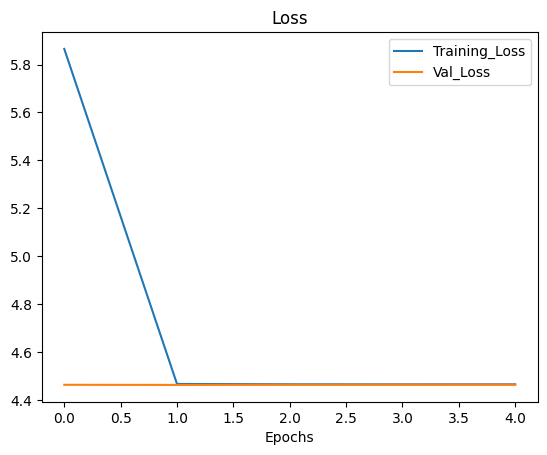

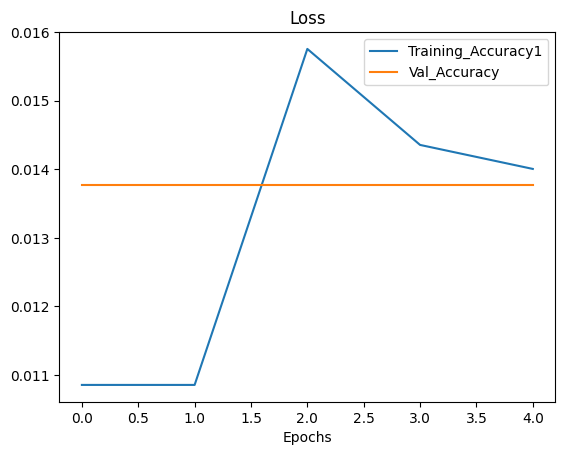

In [21]:
loss_curve(history_1)

## Using Transfer Learning

**VGG16-Model**

In [22]:
len(class_names)

87

In [23]:
from tensorflow.keras.applications import VGG16

vgg_model=VGG16(input_shape = [224,224,3],
                        include_top = False,
                        weights = 'imagenet')


for layer in vgg_model.layers:
     layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [24]:
from tensorflow.keras.layers import Dense, Flatten

output = Dense(87, activation='softmax')(Flatten()(vgg_model.output))

In [25]:
from tensorflow.keras import Model

transfer_model = Model(inputs=vgg_model.input, outputs=output)

In [26]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
transfer_model.compile(loss = "categorical_crossentropy",
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [28]:
import datetime

def tensorboard_callback():
  logdir = os.path.join("Logss", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [29]:
tensorboard = tensorboard_callback()

transfer_hist = transfer_model.fit(train_data,
                                  epochs=100,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data_gen,
                                  validation_steps=len(valid_data_gen),
                                  callbacks=[tensorboard, early_stopping]
                                  )

Epoch 1/100
90/90 [==============================] - 57s 566ms/step - loss: 4.5930 - accuracy: 0.1502 - val_loss: 3.5150 - val_accuracy: 0.2948
Epoch 2/100
90/90 [==============================] - 47s 518ms/step - loss: 2.7550 - accuracy: 0.3834 - val_loss: 2.7149 - val_accuracy: 0.3967
Epoch 3/100
90/90 [==============================] - 46s 514ms/step - loss: 2.2551 - accuracy: 0.4618 - val_loss: 2.8387 - val_accuracy: 0.4160
Epoch 4/100
90/90 [==============================] - 45s 500ms/step - loss: 1.9793 - accuracy: 0.5158 - val_loss: 2.4505 - val_accuracy: 0.4876
Epoch 5/100
90/90 [==============================] - 45s 504ms/step - loss: 1.6502 - accuracy: 0.5795 - val_loss: 2.4324 - val_accuracy: 0.4738
Epoch 6/100
90/90 [==============================] - 46s 515ms/step - loss: 1.5715 - accuracy: 0.6033 - val_loss: 2.4716 - val_accuracy: 0.5262
Epoch 7/100
90/90 [==============================] - 45s 503ms/step - loss: 1.5609 - accuracy: 0.6082 - val_loss: 2.4458 - val_accuracy:

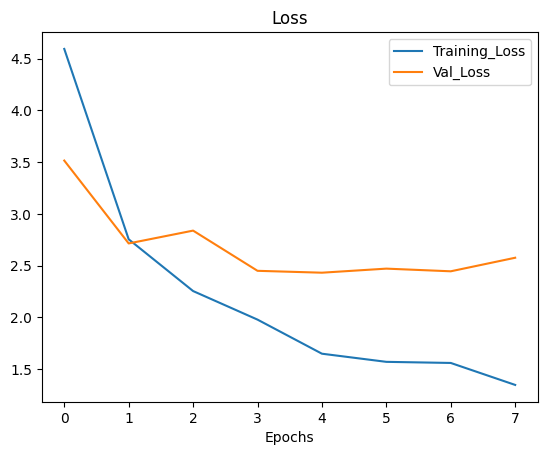

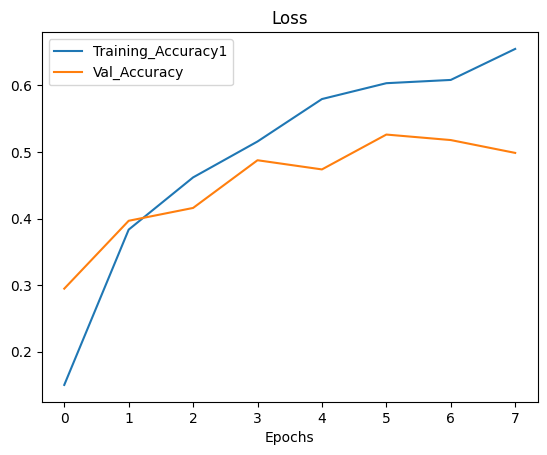

In [30]:
loss_curve(transfer_hist)

**MobileNet_V2-Model**

In [42]:
len(class_names)

87

In [43]:
import tensorflow_hub as hub

INPUT_SHAPE = [None, 224, 224, 3]

OUTPUT_SHAPE = len(class_names)

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [44]:
model_layers = hub.KerasLayer(MODEL_URL, trainable=False)

mob_net_model = tf.keras.Sequential([
    model_layers,
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation='softmax')
])

mob_net_model.build(INPUT_SHAPE)

In [45]:
mob_net_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


mob_net_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense_4 (Dense)             (None, 87)                87174     
                                                                 
Total params: 5,519,887
Trainable params: 87,174
Non-trainable params: 5,432,713
_________________________________________________________________


In [46]:
mob_net_history = mob_net_model.fit(train_data,
                                  epochs=100,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data_gen,
                                  validation_steps=len(valid_data_gen),
                                  callbacks=[tensorboard, early_stopping]
                                  )

Epoch 1/100
90/90 [==============================] - 61s 561ms/step - loss: 2.9792 - accuracy: 0.3358 - val_loss: 1.8637 - val_accuracy: 0.5179
Epoch 2/100
90/90 [==============================] - 44s 492ms/step - loss: 1.1532 - accuracy: 0.6803 - val_loss: 1.4118 - val_accuracy: 0.6336
Epoch 3/100
90/90 [==============================] - 42s 470ms/step - loss: 0.7888 - accuracy: 0.7763 - val_loss: 1.2589 - val_accuracy: 0.6446
Epoch 4/100
90/90 [==============================] - 44s 492ms/step - loss: 0.5918 - accuracy: 0.8305 - val_loss: 1.2036 - val_accuracy: 0.6694
Epoch 5/100
90/90 [==============================] - 43s 477ms/step - loss: 0.4646 - accuracy: 0.8729 - val_loss: 1.2087 - val_accuracy: 0.6749
Epoch 6/100
90/90 [==============================] - 43s 479ms/step - loss: 0.3943 - accuracy: 0.8894 - val_loss: 1.1662 - val_accuracy: 0.6915
Epoch 7/100
90/90 [==============================] - 42s 470ms/step - loss: 0.3238 - accuracy: 0.9188 - val_loss: 1.1807 - val_accuracy:

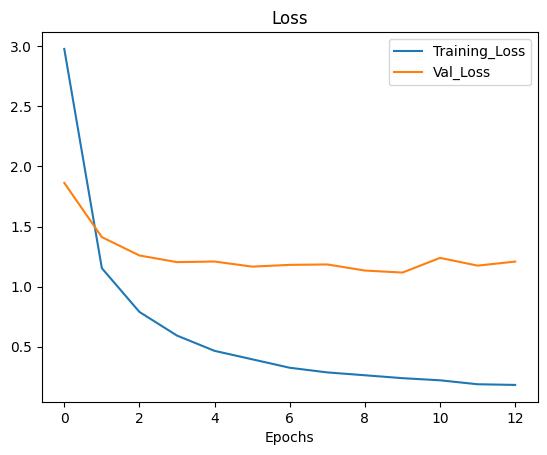

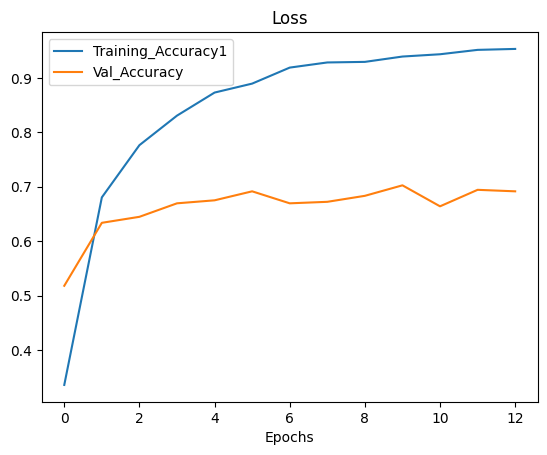

In [47]:
loss_curve(mob_net_history)

**EfficientNet_V2-Model**

In [48]:
MODEL_URL = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

model_layers = hub.KerasLayer(MODEL_URL, trainable=True)

eff_net_model = tf.keras.Sequential([
    model_layers,
    tf.keras.layers.Dense(OUTPUT_SHAPE, activation='softmax')
])

eff_net_model.build(INPUT_SHAPE)

In [49]:
eff_net_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


eff_net_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              5919312   
                                                                 
 dense_5 (Dense)             (None, 87)                111447    
                                                                 
Total params: 6,030,759
Trainable params: 5,970,151
Non-trainable params: 60,608
_________________________________________________________________


In [50]:
eff_net_history = eff_net_model.fit(train_data,
                                  epochs=100,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data_gen,
                                  validation_steps=len(valid_data_gen),
                                  callbacks=[tensorboard, early_stopping]
                                  )

Epoch 1/100
90/90 [==============================] - 119s 570ms/step - loss: 2.4564 - accuracy: 0.3929 - val_loss: 1.4183 - val_accuracy: 0.5427
Epoch 2/100
90/90 [==============================] - 50s 550ms/step - loss: 1.1525 - accuracy: 0.6408 - val_loss: 1.0486 - val_accuracy: 0.6722
Epoch 3/100
90/90 [==============================] - 46s 514ms/step - loss: 0.8266 - accuracy: 0.7391 - val_loss: 1.0831 - val_accuracy: 0.6942
Epoch 4/100
90/90 [==============================] - 48s 528ms/step - loss: 0.7081 - accuracy: 0.7619 - val_loss: 1.0261 - val_accuracy: 0.6997
Epoch 5/100
90/90 [==============================] - 48s 533ms/step - loss: 0.5899 - accuracy: 0.8109 - val_loss: 0.9706 - val_accuracy: 0.7052
Epoch 6/100
90/90 [==============================] - 47s 523ms/step - loss: 0.4715 - accuracy: 0.8456 - val_loss: 1.1824 - val_accuracy: 0.6612
Epoch 7/100
90/90 [==============================] - 49s 540ms/step - loss: 0.4311 - accuracy: 0.8557 - val_loss: 1.1613 - val_accuracy

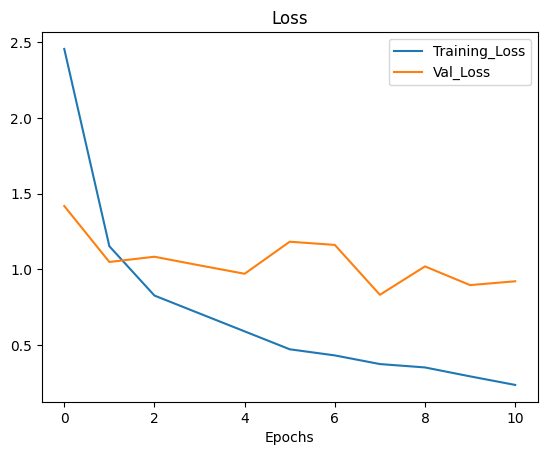

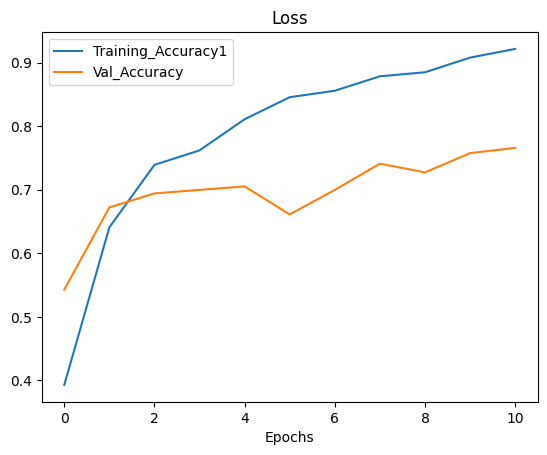

In [51]:
loss_curve(eff_net_history)


# Assumption

Due to 2856 images belonging to 87 classes means there is less than 35 images per class and there are classes like Almandine, Garnet Red, Hessonite, Pyrope,etc looking much the same.

>Therefore, the models are not able to get a high accuracy score.

almandine_20.jpg
img shape: (197, 197, 3)
garnet red_23.jpg
img shape: (300, 300, 3)
hessonite_8.jpg
img shape: (301, 301, 3)
pyrope_34.jpg
img shape: (370, 370, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

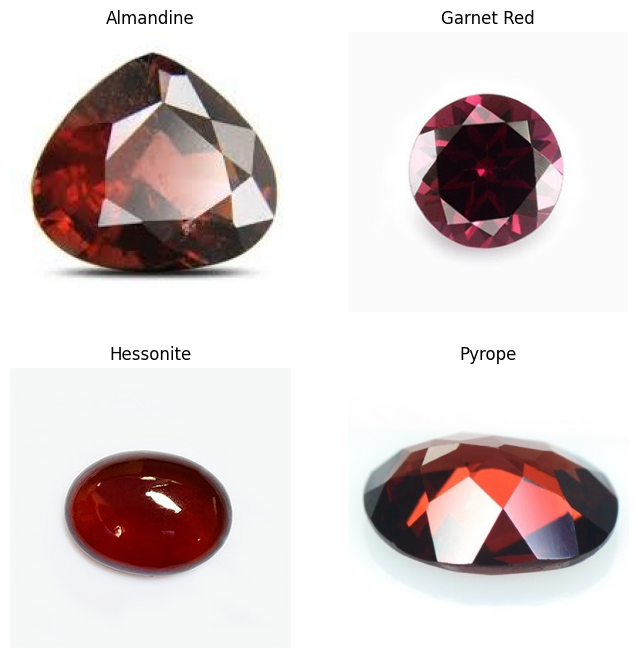

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

view_random_img(train_dir, 'Almandine', ax=ax[0, 0])
view_random_img(train_dir, 'Garnet Red', ax=ax[0, 1])
view_random_img(train_dir, 'Hessonite', ax=ax[1, 0])
view_random_img(train_dir, 'Pyrope', ax=ax[1, 1])

# Making Predictions

In [53]:
img_shape = 224

def preprocess_img_to_classname(model, filename, IMG_SHAPE=img_shape):

  # Read image
  image = tf.io.read_file(filename)

  # Decode into tensors
  image = tf.image.decode_image(image)

  # Resize
  image = tf.image.resize(image, size=[IMG_SHAPE, IMG_SHAPE])

  # Rescale
  image = image/255.

  # Expanding dims
  image = tf.expand_dims(image, axis=0)

  # Prediction
  preds = model.predict(image)

  # ClassName
  name = class_names[tf.argmax(preds[0])]
  return name

In [54]:
!wget https://2.bp.blogspot.com/-oy5HXxT7lTw/WQSlp9-4GGI/AAAAAAAAEt0/UQ5bvF0_QW8KP6GCVu1nUwBllYcyYw6egCLcB/s1600/pyrope-garnet-gem-227409a.jpg

--2023-08-11 16:12:38--  https://2.bp.blogspot.com/-oy5HXxT7lTw/WQSlp9-4GGI/AAAAAAAAEt0/UQ5bvF0_QW8KP6GCVu1nUwBllYcyYw6egCLcB/s1600/pyrope-garnet-gem-227409a.jpg
Resolving 2.bp.blogspot.com (2.bp.blogspot.com)... 74.125.130.132, 2404:6800:4003:c01::84
Connecting to 2.bp.blogspot.com (2.bp.blogspot.com)|74.125.130.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14101 (14K) [image/jpeg]
Saving to: ‘pyrope-garnet-gem-227409a.jpg.1’

pyrope-garnet-gem-2 100%[===================>]  13.77K  --.-KB/s    in 0s      

2023-08-11 16:12:38 (103 MB/s) - ‘pyrope-garnet-gem-227409a.jpg.1’ saved [14101/14101]



In [55]:
GEM = "/content/pyrope-garnet-gem-227409a.jpg"

Text(0.5, 1.0, 'Pyrope')

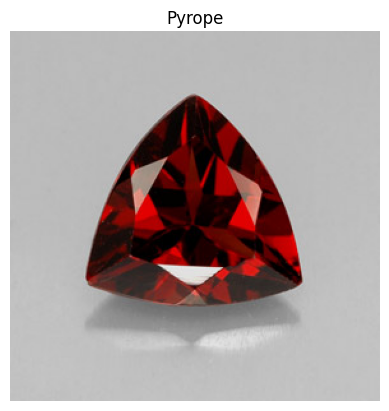

In [59]:
pyrope = mpimg.imread(GEM)
plt.imshow(pyrope)
plt.axis('off');
plt.title('Pyrope')

In [65]:
# Prediction of the above image.
preprocess_img_to_classname(eff_net_model, GEM)

1/1 [==============================] - 5s 5s/step


'Pyrope'

In [58]:
!wget https://i.ebayimg.com/images/g/-toAAOSwFWdbBUA3/s-l400.jpg
!wget https://myratna.com/uploads/categories/Green-Onyx-Gemstone1.jpg
!wget https://df2sm3urulav.cloudfront.net/tenants/gr/uploads/content/4wmnqlctgu0f3c9a.jpg

--2023-08-11 16:12:50--  https://i.ebayimg.com/images/g/-toAAOSwFWdbBUA3/s-l400.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 23.52.113.10
Connecting to i.ebayimg.com (i.ebayimg.com)|23.52.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21164 (21K) [image/jpeg]
Saving to: ‘s-l400.jpg.1’

s-l400.jpg.1        100%[===================>]  20.67K  --.-KB/s    in 0.001s  

2023-08-11 16:12:50 (14.4 MB/s) - ‘s-l400.jpg.1’ saved [21164/21164]

--2023-08-11 16:12:50--  https://myratna.com/uploads/categories/Green-Onyx-Gemstone1.jpg
Resolving myratna.com (myratna.com)... 128.199.141.8
Connecting to myratna.com (myratna.com)|128.199.141.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16626 (16K) [image/jpeg]
Saving to: ‘Green-Onyx-Gemstone1.jpg.1’

Green-Onyx-Gemstone 100%[===================>]  16.24K  --.-KB/s    in 0.001s  

2023-08-11 16:12:51 (13.9 MB/s) - ‘Green-Onyx-Gemstone1.jpg.1’ saved [16626/16626]

--2023-08-11 16:12:51--  

In [70]:
diaspore = "/content/s-l400.jpg"
onyxGreen = "/content/Green-Onyx-Gemstone1.jpg"
ruby = "/content/4wmnqlctgu0f3c9a.jpg"

Text(0.5, 1.0, 'Ruby')

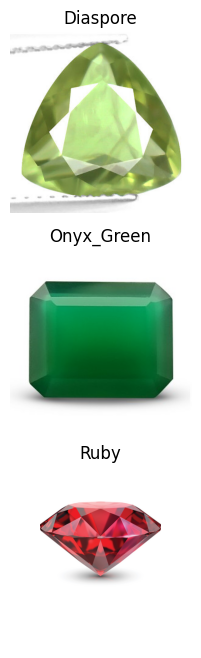

In [69]:
# Original GEM NAMES.

fig, ax = plt.subplots(3, 1, figsize=(8,8))

Diaspore = mpimg.imread("/content/s-l400.jpg")
ax[0].imshow(Diaspore)
ax[0].axis("off");
ax[0].set_title('Diaspore')

Onyx_Green = mpimg.imread("/content/Green-Onyx-Gemstone1.jpg")
ax[1].imshow(Onyx_Green)
ax[1].axis("off");
ax[1].set_title('Onyx_Green')

Ruby = mpimg.imread("/content/4wmnqlctgu0f3c9a.jpg")
ax[2].imshow(Ruby)
ax[2].axis("off");
ax[2].set_title('Ruby')

1/1 [==============================] - 0s 75ms/step


Text(0.5, 1.0, "['Rhodolite', 'Garnet Red']")

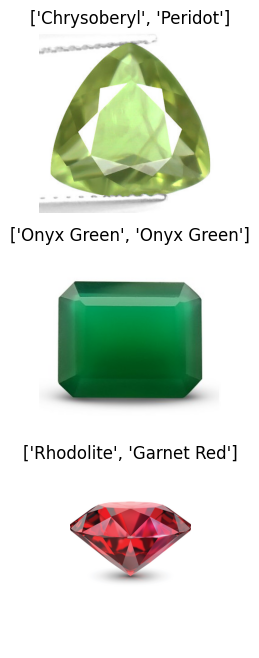

In [72]:
# Predicted GEM NAMES in format [mobileNet_model, efficientNet_model]

fig, ax = plt.subplots(3, 1, figsize=(8,8))

Diaspore = mpimg.imread("/content/s-l400.jpg")
ax[0].imshow(Diaspore)
ax[0].axis("off");
ax[0].set_title([preprocess_img_to_classname(mob_net_model, diaspore), preprocess_img_to_classname(eff_net_model, diaspore)])

Onyx_Green = mpimg.imread("/content/Green-Onyx-Gemstone1.jpg")
ax[1].imshow(Onyx_Green)
ax[1].axis("off");
ax[1].set_title([preprocess_img_to_classname(mob_net_model, onyxGreen), preprocess_img_to_classname(eff_net_model, onyxGreen)])

Ruby = mpimg.imread("/content/4wmnqlctgu0f3c9a.jpg")
ax[2].imshow(Ruby)
ax[2].axis("off");
ax[2].set_title([preprocess_img_to_classname(mob_net_model, ruby), preprocess_img_to_classname(eff_net_model, ruby)])

chrysoberyl_0.jpg
img shape: (225, 225, 3)
peridot_30.jpg
img shape: (301, 301, 3)
rhodolite_39.jpg
img shape: (355, 355, 3)
garnet red_39.jpg
img shape: (290, 290, 3)


array([[[194, 190, 189],
        [193, 189, 188],
        [193, 189, 188],
        ...,
        [194, 190, 189],
        [193, 189, 188],
        [193, 189, 188]],

       [[193, 189, 188],
        [193, 189, 188],
        [193, 189, 188],
        ...,
        [194, 190, 189],
        [193, 189, 188],
        [193, 189, 188]],

       [[193, 189, 188],
        [193, 189, 188],
        [193, 189, 188],
        ...,
        [194, 190, 189],
        [193, 189, 188],
        [193, 189, 188]],

       ...,

       [[193, 189, 188],
        [193, 189, 188],
        [194, 190, 189],
        ...,
        [196, 192, 191],
        [197, 193, 192],
        [194, 190, 189]],

       [[195, 191, 188],
        [195, 191, 188],
        [194, 190, 187],
        ...,
        [197, 193, 192],
        [196, 192, 189],
        [196, 192, 189]],

       [[195, 191, 188],
        [195, 191, 188],
        [194, 190, 187],
        ...,
        [197, 193, 192],
        [194, 190, 187],
        [194, 190, 187]]

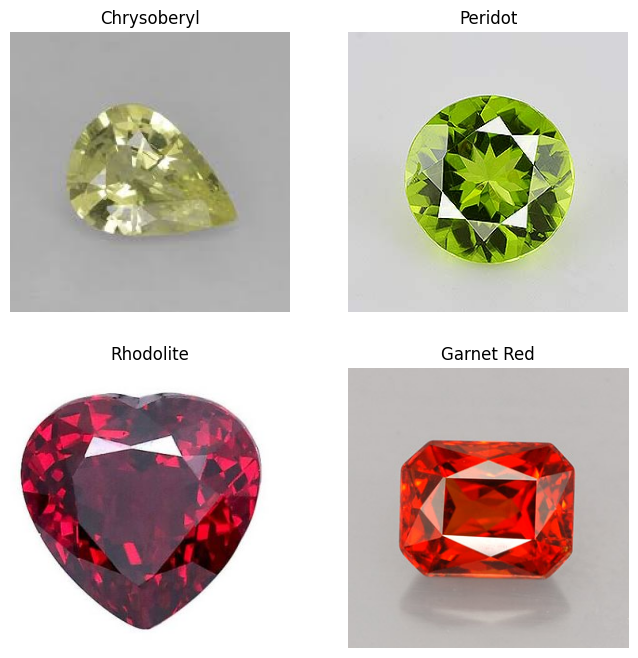

In [75]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

view_random_img(train_dir, 'Chrysoberyl', ax=ax[0, 0])
view_random_img(train_dir, 'Peridot', ax=ax[0, 1])
view_random_img(train_dir, 'Rhodolite', ax=ax[1, 0])
view_random_img(train_dir, 'Garnet Red', ax=ax[1, 1])

Observation: The above images are the wrong predictions made by both the model which looks quite simillar to the actual GEM Images.

## Saving the model

In [76]:
model = eff_net_model.save('gemstone_model.h5')